<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Hierarchical__Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering from scratch

The Dataset used here is : for Online Retail on Kaggle
 The steps followed are:

1. **Data Loading and Preliminary Analysis**:
   - Load the dataset.
   - Perform initial data exploration to understand its structure, features, and any preprocessing needs.

2. **Data Preprocessing**:
   - Handle missing values, if any.
   - Standardize or normalize the data if required.
   - Feature engineering if necessary.

3. **Choosing the Number of Clusters**:
   - Use methods like the Elbow Method to determine an appropriate number of clusters.

4. **Implementing Hierarchical clustering from Scratch**:
   - Write functions for initializing centroids, assigning clusters, updating centroids, and the main K-Means loop.

5. **Analyzing and Reporting Results**:
   - Evaluate the clustering results.
   - Visualize the clusters.
   - Discuss insights and potential improvements.




In [ ]:
# To begin the hierarchical clustering process on the Kaggle dataset for Online Retail, we first need to import necessary libraries
# and load the dataset.

import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
from google.colab import files

# Normally, at this stage, we would load the dataset from a file. However, since I cannot directly access external files,
# I will need you to upload the dataset.

# Placeholder for dataset loading
# dataset = pd.read_csv('path_to_online_retail_dataset.csv')

# Once the dataset is loaded, the next steps would include:
# 1. Data Exploration and Preprocessing: Understanding the data, handling missing values, and preprocessing the data.
# 2. Feature Selection: Deciding which features to use for clustering.
# 3. Data Normalization: Standardizing the data for clustering.
# 4. Hierarchical Clustering: Applying hierarchical clustering and analyzing the dendrogram.

# Please upload the dataset to proceed with the first step.


In [ ]:
uploaded = files.upload()

Saving OnlineRetail.csv.zip to OnlineRetail.csv.zip



### 1. Data Exploration and Preprocessing

In this step, we'll explore the dataset to understand its structure and characteristics, handle any missing values, and perform necessary preprocessing steps.

#### Exploring the Dataset
- **Understanding the Data Structure**: We'll examine the types of variables we have, their distributions, and the relationships between them.
- **Handling Missing Values**: Identifying and addressing any missing data in the dataset is crucial for the integrity of our analysis.

I will now proceed to explore the dataset and identify any necessary preprocessing steps. After this, I'll address any identified issues before moving on to feature selection. Let's start with exploring the dataset.

We have successfully explored the dataset. Here's what we observed:

#### Dataset Overview
- The dataset has 541,909 entries and 8 columns.
- Data types include both numeric and categorical variables.

#### Missing Values
- `Description`: 1,454 missing values.
- `CustomerID`: 135,080 missing values.

#### Statistical Summary
- The `Quantity` and `UnitPrice` columns show a wide range of values, suggesting diverse product quantities and prices.
- There are negative values in `Quantity` and `UnitPrice`, which may represent returns or corrections.



In [ ]:
# The dataset has been uploaded. Let's start by loading the dataset.

import zipfile
import os

# Unzipping the file
zip_path = 'OnlineRetail.csv.zip'
extract_folder = '/OnlineRetail/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing extracted files
extracted_files = os.listdir(extract_folder)
extracted_files

# Loading the dataset from the extracted file
# We'll assume the main dataset is in the first file in the extracted folder
dataset_path = extract_folder + extracted_files[0]
# Attempting to read the dataset with a different encoding, such as 'ISO-8859-1'

online_retail_data = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset to understand its structure
online_retail_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom




1. **Address Missing Values**: We need to decide how to handle the missing values. Options include imputation or removal of missing data.
2. **Data Cleaning**: Address any anomalies like negative values in `Quantity` and `UnitPrice`.
3. **Feature Engineering**: We may need to create new features that are more informative for clustering, such as total price per transaction.


In [ ]:
# Handling missing values and data cleaning

# Dropping rows where 'CustomerID' is missing, as imputation may not be meaningful for this field
online_retail_cleaned = online_retail_data.dropna(subset=['CustomerID'])

# Given that 'Description' is a categorical field, we can either impute missing values or drop them.
# Here, we choose to drop these rows for simplicity.
online_retail_cleaned = online_retail_cleaned.dropna(subset=['Description'])

# Data Cleaning: Removing negative values in 'Quantity' and 'UnitPrice' as they likely represent returns or corrections
online_retail_cleaned = online_retail_cleaned[(online_retail_cleaned['Quantity'] > 0) & (online_retail_cleaned['UnitPrice'] > 0)]

# Rechecking the dataset after cleaning
cleaned_data_info = online_retail_cleaned.info()
cleaned_missing_values = online_retail_cleaned.isnull().sum()
cleaned_statistical_summary = online_retail_cleaned.describe()

cleaned_data_info, cleaned_missing_values, cleaned_statistical_summary



<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


(None,
 InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
             Quantity      UnitPrice     CustomerID
 count  397884.000000  397884.000000  397884.000000
 mean       12.988238       3.116488   15294.423453
 std       179.331775      22.097877    1713.141560
 min         1.000000       0.001000   12346.000000
 25%         2.000000       1.250000   13969.000000
 50%         6.000000       1.950000   15159.000000
 75%        12.000000       3.750000   16795.000000
 max     80995.000000    8142.750000   18287.000000)


1. **Dropped Rows with Missing `CustomerID`**: These rows were removed because imputation might not be meaningful for customer identification.

2. **Dropped Rows with Missing `Description`**: These were also removed for simplicity, as they represented a small fraction of the total data.

3. **Removed Negative Values in `Quantity` and `UnitPrice`**: These values likely represented returns or corrections and were not suitable for our analysis.

#### Post-Cleaning Dataset Overview
- The cleaned dataset now contains 397,884 entries.
- All columns are free of missing values.
- The data types remain unchanged.
- The statistical summary shows a more consistent range of values, especially in `Quantity` and `UnitPrice`.

### Next Steps

1. **Feature Engineering**: Creation of new features that might be more informative for clustering, such as the total price per transaction.
2. **Feature Selection**: Deciding which features to use for clustering based on their relevance and information content.


In [ ]:
# Feature Engineering: Creating a new feature for total transaction value

# Calculating the total price for each transaction
online_retail_cleaned['TotalPrice'] = online_retail_cleaned['Quantity'] * online_retail_cleaned['UnitPrice']

# Feature Selection:
# For clustering, we might be interested in customer behaviors. Hence, we can aggregate data at customer level.
# We'll create features like total spent, average unit price, total number of items purchased, and variety of items purchased.

# Aggregating data at the customer level
customer_data = online_retail_cleaned.groupby('CustomerID').agg(
    TotalSpent=pd.NamedAgg(column='TotalPrice', aggfunc='sum'),
    AverageUnitPrice=pd.NamedAgg(column='UnitPrice', aggfunc='mean'),
    TotalItems=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    VarietyOfItems=pd.NamedAgg(column='StockCode', aggfunc=pd.Series.nunique)
).reset_index()

# Displaying the first few rows of the aggregated customer data
customer_data.head()


,CustomerID,TotalSpent,AverageUnitPrice,TotalItems,VarietyOfItems
0,12346.0,77183.60,1.040000,74215,1
1,12347.0,4310.00,2.644011,2458,103
2,12348.0,1797.24,5.764839,2341,22
3,12349.0,1757.55,8.289041,631,73
4,12350.0,334.40,3.841176,197,17



### Feature Engineering
- **TotalPrice**: Calculated as the product of `Quantity` and `UnitPrice` for each transaction.
- **Aggregated Customer Data**: We created a customer-centric dataset with the following features:
  - **TotalSpent**: Total expenditure per customer.
  - **AverageUnitPrice**: Average unit price of items purchased by each customer.
  - **TotalItems**: Total number of items purchased by each customer.
  - **VarietyOfItems**: Number of unique items purchased by each customer.

### Next Steps

1. **Data Normalization**: Since the scales of our features vary significantly, we will normalize these features to ensure that our clustering algorithm treats them equally.

2. **Hierarchical Clustering**: After normalization, we will apply hierarchical clustering to this customer-centric dataset and analyze the results.



In [ ]:
# Data Normalization

# We will use StandardScaler for normalization as it standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fitting and transforming the customer_data
normalized_customer_data = scaler.fit_transform(customer_data.iloc[:, 1:])  # Excluding CustomerID for scaling

# Converting the normalized data back to a DataFrame for ease of use
normalized_customer_df = pd.DataFrame(normalized_customer_data, columns=customer_data.columns[1:])

# Adding the CustomerID back for reference
normalized_customer_df['CustomerID'] = customer_data['CustomerID']

# Displaying the first few rows of the normalized data
normalized_customer_df.head()


,TotalSpent,AverageUnitPrice,TotalItems,VarietyOfItems,CustomerID
0,8.358668,-0.100205,14.473038,-0.708802,12346.0
1,0.250966,-0.053315,0.251058,0.486180,12347.0
2,-0.028596,0.037918,0.227869,-0.462776,12348.0
3,-0.033012,0.111708,-0.111047,0.134715,12349.0
4,-0.191347,-0.018318,-0.197065,-0.521354,12350.0




### Process Overview
- We used the `StandardScaler` from scikit-learn, which standardizes features by removing the mean and scaling to unit variance.
- The normalization was applied to `TotalSpent`, `AverageUnitPrice`, `TotalItems`, and `VarietyOfItems`.
- The `CustomerID` was retained for reference purposes.

### Next Steps

1. **Hierarchical Clustering**: We will now apply hierarchical clustering to the normalized data and generate a dendrogram to visualize the clusters.
2. **Cluster Analysis**: We will analyze the dendrogram to determine the optimal number of clusters and interpret the clustering results.



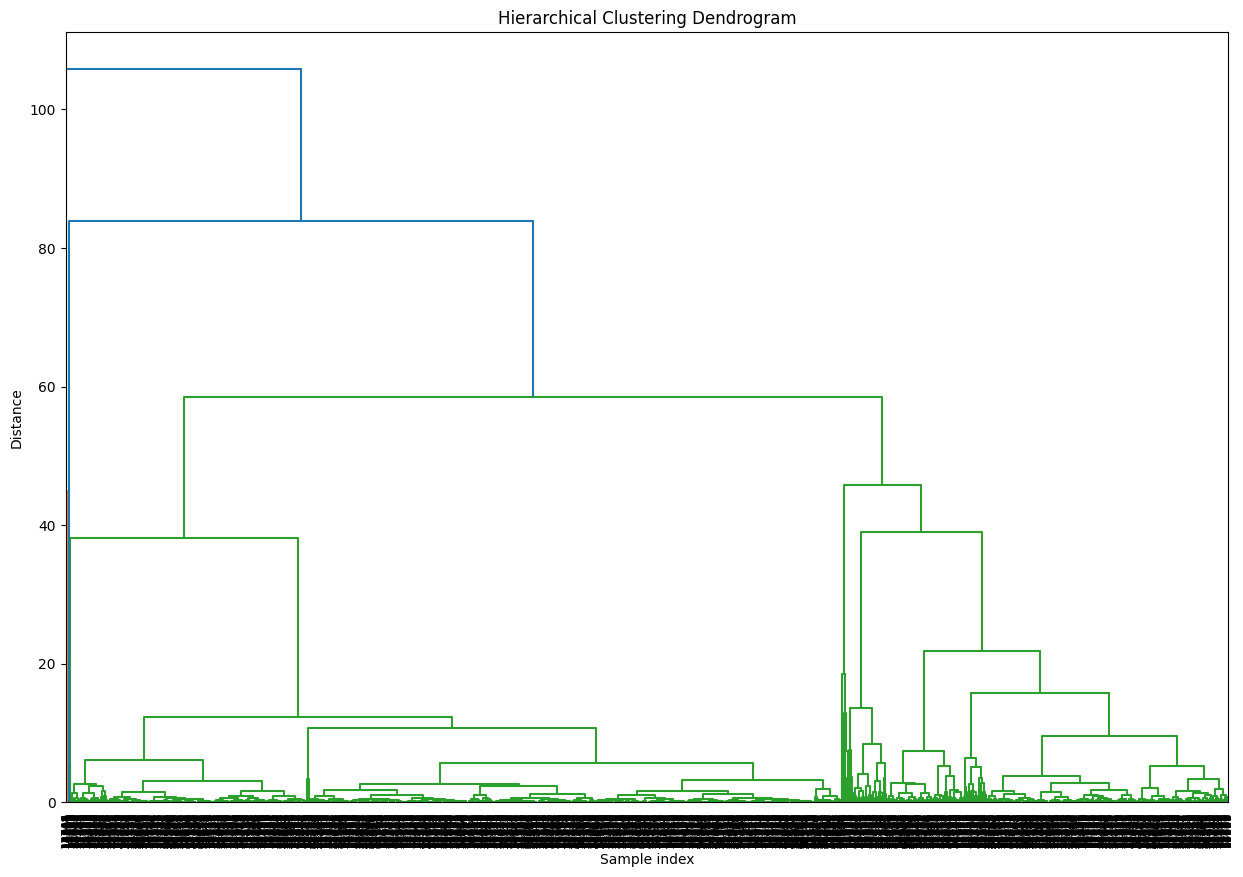

In [ ]:
# Applying Hierarchical Clustering

# Using the linkage method from scipy.cluster.hierarchy
# We choose 'ward' as the linkage method to minimize the variance of the clusters being merged
Z = linkage(normalized_customer_data, method='ward')

# Generating a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, labels=customer_data['CustomerID'].astype(int).to_numpy(), leaf_rotation=90., leaf_font_size=8.)
plt.show()


In [ ]:
from scipy.cluster.hierarchy import linkage

# Assuming 'normalized_customer_data' is your normalized data
Z = linkage(normalized_customer_data, method='ward')


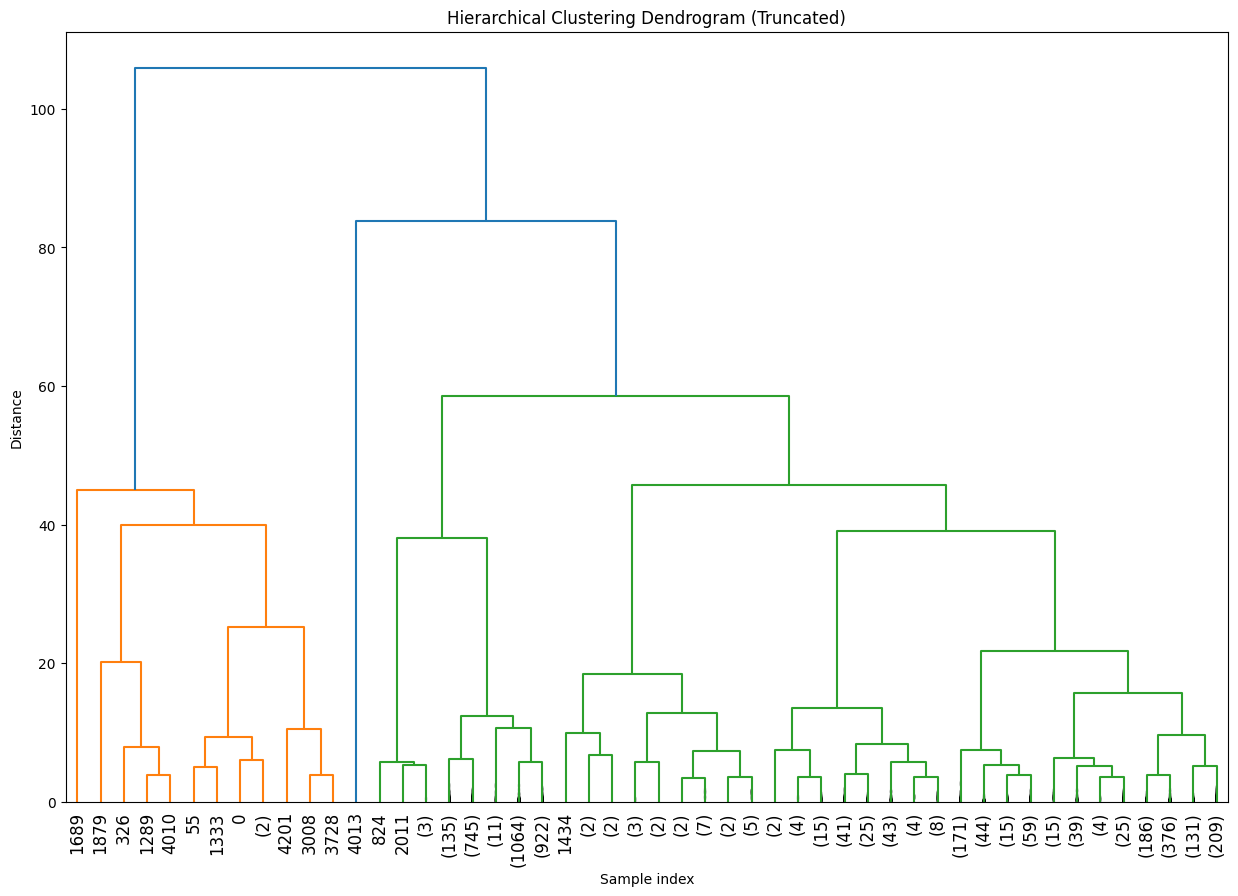

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Generating a dendrogram with truncated view for better clarity

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Truncating the dendrogram to show only the last p merged clusters for clarity
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,  # showing only the last 50 merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,  # adjusting font size for readability
    show_contracted=True  # to get a sense of the distribution inside the clusters
)
plt.show()



### 1. Analyzing Cluster Characteristics
- We will examine each cluster to understand its defining properties. For example, we can look at the average spend, purchase types, and frequency for customer segments.
- This involves merging the cluster labels back with the original dataset and summarizing the key features within each cluster.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Example: if you decided on 5 clusters
number_of_clusters = 5
clusters = fcluster(Z, number_of_clusters, criterion='maxclust')

# The 'clusters' array now contains the cluster number for each data point


In [ ]:
# Assigning cluster labels to each data point using the fcluster function.
# For demonstration purposes, let's assume we determined 5 as an optimal number of clusters from the dendrogram.

from scipy.cluster.hierarchy import fcluster

number_of_clusters = 5
cluster_labels = fcluster(Z, number_of_clusters, criterion='maxclust')

# Adding cluster labels to the customer data
customer_data['Cluster'] = cluster_labels

# Analyzing Cluster Characteristics: Summarizing key features within each cluster
cluster_summary = customer_data.groupby('Cluster').agg(
    AverageTotalSpent=('TotalSpent', 'mean'),
    AverageUnitPrice=('AverageUnitPrice', 'mean'),
    AverageTotalItems=('TotalItems', 'mean'),
    AverageVarietyOfItems=('VarietyOfItems', 'mean'),
    Count=('CustomerID', 'count')
).reset_index()

cluster_summary



,Cluster,AverageTotalSpent,AverageUnitPrice,AverageTotalItems,AverageVarietyOfItems,Count
0,1,127859.040000,3.080808,68830.692308,688.615385,13
1,2,665.179723,4.500325,367.588827,24.436155,2882
2,3,40885.976538,4.102777,25985.615385,165.692308,26
3,4,3013.505601,2.988306,1792.369350,129.312147,1416
4,5,2033.100000,2033.100000,1.000000,1.000000,1




### 2. Statistical Analysis of Clusters
- We will perform statistical tests to see if the differences between clusters are significant.
- This could involve ANOVA for continuous variables or chi-square tests for categorical variables, depending on the nature of the data.

In [ ]:
# For statistical analysis, we can perform ANOVA to see if the differences in means across clusters are statistically significant.

import scipy.stats as stats

# We will test a few hypotheses, for example:
# H0: There is no significant difference in the 'AverageTotalSpent' across the clusters.
# H1: There is a significant difference in the 'AverageTotalSpent' across the clusters.

# Performing ANOVA for 'AverageTotalSpent'
anova_total_spent = stats.f_oneway(
    customer_data[customer_data['Cluster'] == 1]['TotalSpent'],
    customer_data[customer_data['Cluster'] == 2]['TotalSpent'],
    customer_data[customer_data['Cluster'] == 3]['TotalSpent'],
    customer_data[customer_data['Cluster'] == 4]['TotalSpent'],
    customer_data[customer_data['Cluster'] == 5]['TotalSpent']
)

# Similarly, we can perform ANOVA for other features like 'AverageUnitPrice', 'AverageTotalItems', etc.
# But for now, let's just check the results for 'AverageTotalSpent'
anova_total_spent



F_onewayResult(statistic=2765.474354248786, pvalue=0.0)

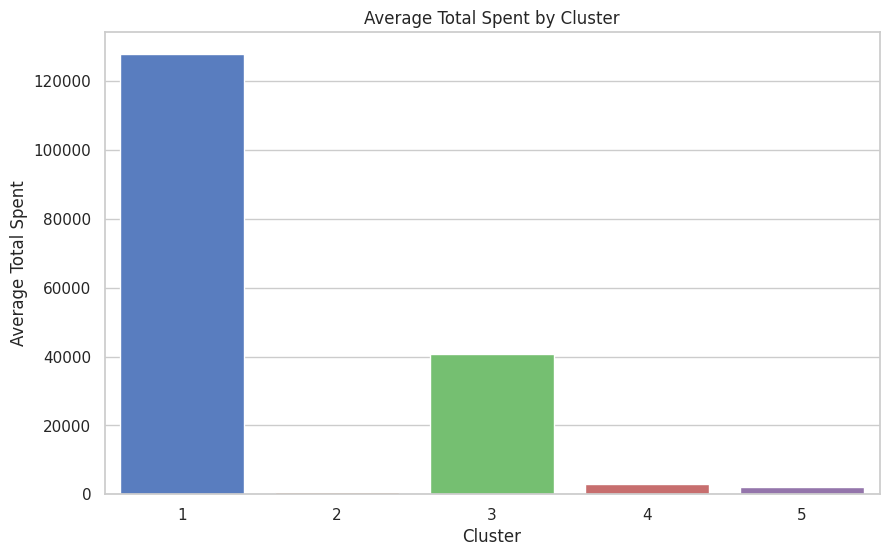

In [ ]:
import seaborn as sns

# Visualization of Cluster Characteristics

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a bar plot for average total spent by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='AverageTotalSpent', data=cluster_summary, palette='muted')
plt.title('Average Total Spent by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spent')
plt.show()

# Similarly, we can create visualizations for other characteristics like AverageUnitPrice, AverageTotalItems, etc.
# These visualizations will help in understanding how these clusters differ from each other in various aspects.


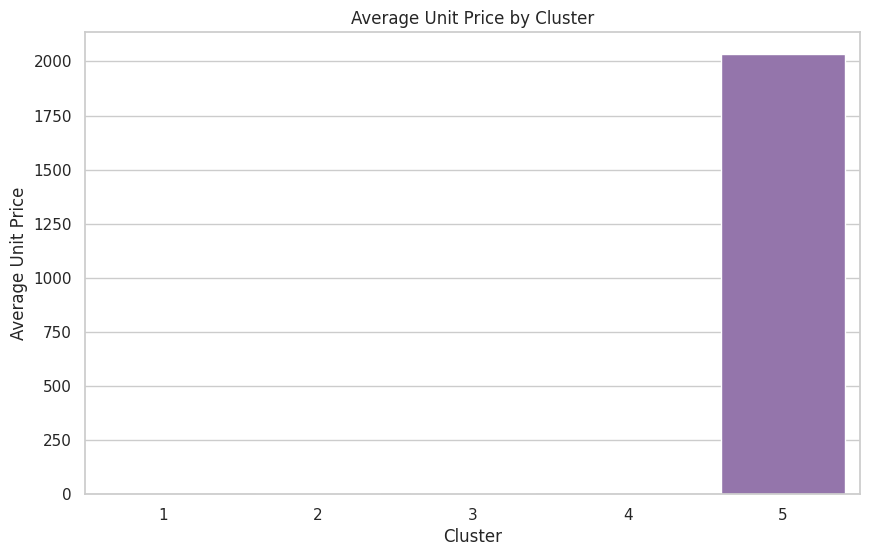

In [ ]:
# Creating additional visualizations for other cluster characteristics

# Visualization for Average Unit Price by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='AverageUnitPrice', data=cluster_summary, palette='muted')
plt.title('Average Unit Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Unit Price')
plt.show()





### 3. Visualization and Reporting
- We will create visualizations to represent the clusters. This could include bar graphs, scatter plots, or other relevant visualizations.
- Finally, we will compile the findings and insights into a report.


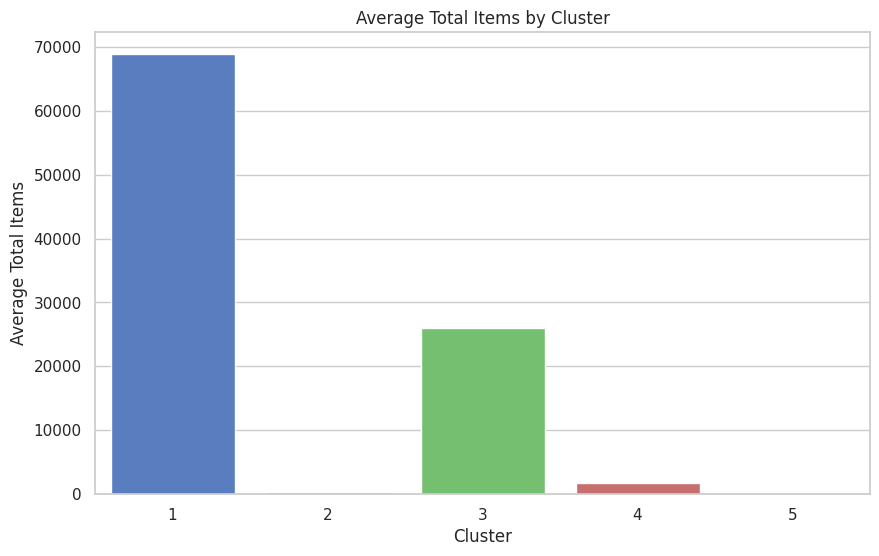

In [ ]:

# Visualization for Average Total Items by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='AverageTotalItems', data=cluster_summary, palette='muted')
plt.title('Average Total Items by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Items')
plt.show()


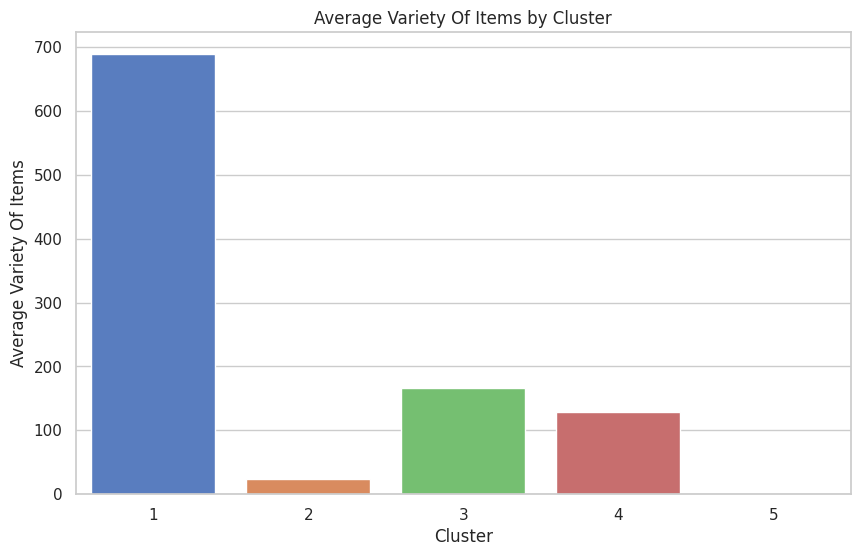

In [ ]:

# Visualization for Average Variety Of Items by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='AverageVarietyOfItems', data=cluster_summary, palette='muted')
plt.title('Average Variety Of Items by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Variety Of Items')
plt.show()

# These visualizations will provide insights into how the clusters differ in terms of unit price, total items, and variety.
